In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [48]:
# Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.
a = np.random.random (30).reshape (10, 3)
#print(a)
print (np.take_along_axis (a, np.argmin (abs(a-0.5), axis=1).reshape(10, 1), axis=1))

[[0.57448035]
 [0.20234579]
 [0.38000618]
 [0.42340884]
 [0.4543371 ]
 [0.40511691]
 [0.7463839 ]
 [0.75193364]
 [0.34074774]
 [0.41298556]]


# Task 2

In [49]:
# Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.
a = np.random.random (36).reshape (6, 6)
#print(a, '\n\n')
print (np.sum (a, axis=1)/np.min (a, axis=0), '\n\n')            # если хотим сумму в i-ой строчке делить на минимум в i-ом столбце
#print (np.sum (a, axis=1).reshape(6,1)/np.min (a, axis=0))      # если хотим сумму в каждой строчке делить на минимум в каждом из столбцов

[ 27.13006777 132.36891322  13.26005348  73.10956598  11.31271082
  14.99174774] 




# Task 3

In [50]:
# На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print (np.max (np.lib.stride_tricks.as_strided(x, shape=(np.size(x)-1, 2), strides=(4, 4)) [np.lib.stride_tricks.as_strided(x, shape=(np.size(x)-1, 2), strides=(4, 4))[:, 0] == 0] [:, 1]))

5


# Task 4

In [51]:
# Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.
x = np.ones(10) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x[np.unique (i, return_counts = True)[0]] += np.unique (i, return_counts = True)[1] # предполагаем корректные входные данные
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


# Task 5

In [52]:
# Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).
def kmeans(points, k_or_guess, iter=20, thresh=1e-5, dist = -1):
    count_points = np.shape(points)[0]
    if (iter <= 0 or thresh < 0):
        raise
        
    if type (k_or_guess) == type (np.array ([])):
        centers = k_or_guess
        count_centers = np.shape (k_or_guess)[0]
    elif type (k_or_guess) == int and k_or_guess > 0:
        count_centers = k_or_guess
        centers = points[np.random.choice (count_points, count_centers, replace = False)]
    else:
        raise
    
    if (np.shape(centers)[1] != np.shape(points)[1]):
        raise
        
    x = centers[[np.argmin( np.sum((centers-i)**2, axis = 1)) for i in points]]
    centers, y = np.unique(x, axis=0, return_inverse=True)
    
    new_centers = np.zeros (np.shape(centers))
    for i in range (count_points):
        new_centers[y[i]] += points[i]/np.count_nonzero (y==y[i])
    new_dist = np.sum((points - new_centers[y])**2)

    if ( (dist >= 0 and dist-new_dist<thresh) or iter == 1):
        return new_centers, new_dist
    return kmeans (points, new_centers, iter-1, thresh, new_dist)

# Task 6

In [53]:
# С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.
def draw_clusters (arr, ep, results, colors, name_x, name_y):
    centers = results[ep-1][0]
    for i in range (ep):
        plt.scatter([], [], c=colors[i], label="Group №"+str(i+1))
    for i in a:
        plt.scatter(*i, c=colors [np.argmin( np.sum((centers-i)**2, axis=1))])
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.axis('equal')
    plt.legend()
    plt.show()

In [54]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

data[:, 1] = (data[:, 1] == 'Male')
data = data.astype(float)
max_k = 10
colors = ['r', 'g',  'b', 'c', 'm',  'y', 'k', 'brown',  'pink', 'grey']

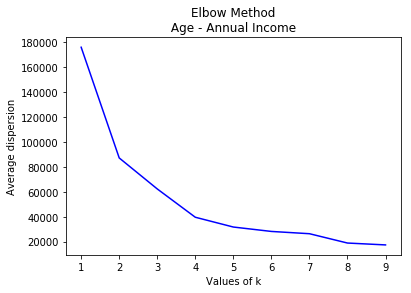

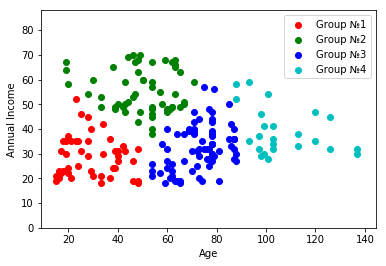

In [57]:
a = np.array ([data[:, 3], data[:, 2]]).T
results = np.array([kmeans (a, k, 50) for k in range (1, max_k)])
plt.plot(range(1,max_k), results[:,1], 'b')
plt.xlabel('Values of k')
plt.ylabel('Average dispersion')
plt.title('Elbow Method\n Age - Annual Income ')
plt.show()
#elbow point = 4
draw_clusters (a, 4, results, colors, 'Age', 'Annual Income')

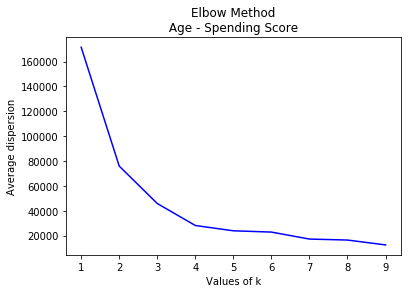

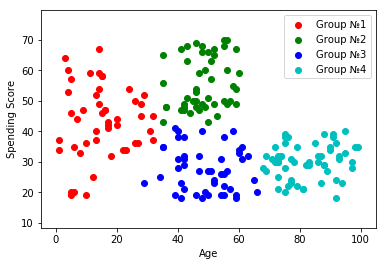

In [56]:
a = np.array ([data[:, 4], data[:, 2]]).T
results = np.array([kmeans (a, k, 50) for k in range (1, max_k)])
plt.plot(range(1,max_k), results[:,1], 'b')
plt.xlabel('Values of k')
plt.ylabel('Average dispersion')
plt.title('Elbow Method\n Age - Spending Score ')
plt.show()
#elbow point = 4
draw_clusters (a, 4, results, colors, 'Age', 'Spending Score')

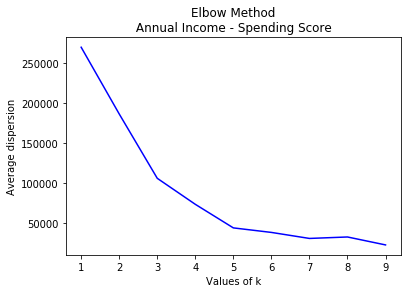

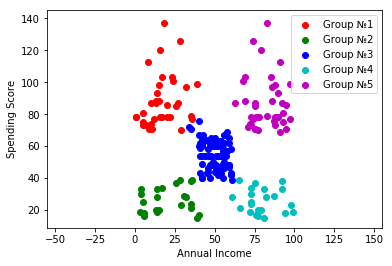

In [60]:
a = np.array ([data[:, 4], data[:, 3]]).T
results = np.array([kmeans (a, k, 50) for k in range (1, max_k)])
plt.plot(range(1,max_k), results[:,1], 'b')
plt.xlabel('Values of k')
plt.ylabel('Average dispersion')
plt.title('Elbow Method\n Annual Income - Spending Score ')
plt.show()
#elbow point = 5
draw_clusters (a, 5, results, colors, 'Annual Income', 'Spending Score')